In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv('Titanic_Data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Wrangling

In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visualization

In [5]:
int(titanic_df['Age'].mean())

29

In [6]:
# Without inplace = True, Age column NA is not updated
titanic_df['Age'].fillna(29)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

titanic_df.isnull().sum()

In [7]:
int(titanic_df['Age'].median())

28

In [8]:
int(titanic_df['Age'].mode())

24

### Handling missing values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

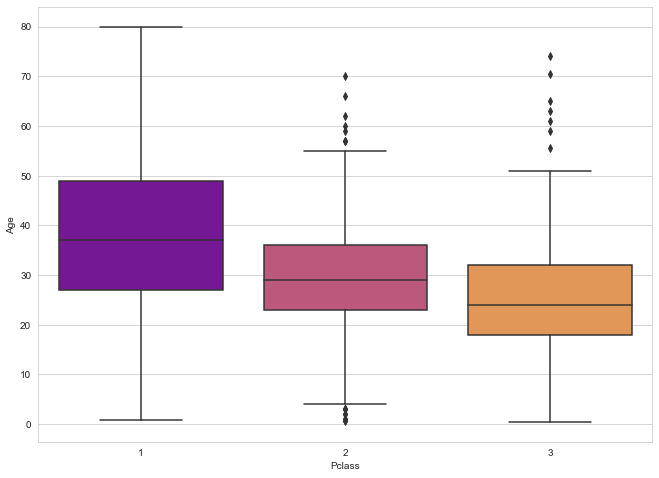

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_df, palette = 'plasma')

### UDF - Simple Imputer

In [10]:
def imputer_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(imputer_age, axis=1)

In [12]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Outliers

<AxesSubplot:ylabel='Age'>

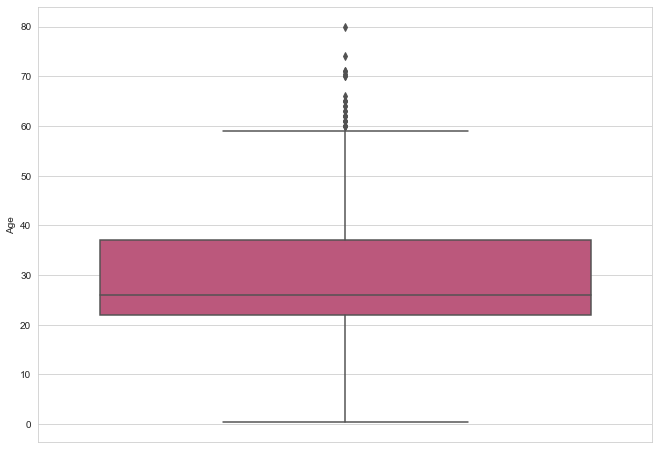

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.boxplot(y = 'Age', data = titanic_df, palette = 'plasma')

In [14]:
# Quartiles 

q1 = titanic_df['Age'].quantile(0.25)
q3 = titanic_df['Age'].quantile(0.75)

print(q1)
print(q3)

22.0
37.0


In [15]:
# Find outliers

def find_outliers(input_df):
    q1 = input_df.quantile(0.25)
    q3 = input_df.quantile(0.75)
    
    iqr = q3 - q1;
    
    min_range = q1 - 1.5 * iqr
    max_range = q3 + 1.5 * iqr
    
    # indexes of outliers
    outliers_indices = list(input_df.index[(input_df < min_range) | (input_df > max_range)])
    outliers_values = list(input_df[outliers_indices])
    return outliers_indices, outliers_values

In [16]:
print(find_outliers(titanic_df['Age']))

([33, 54, 96, 116, 170, 252, 275, 280, 326, 366, 438, 456, 483, 493, 545, 555, 570, 587, 625, 630, 672, 684, 694, 745, 829, 851], [66.0, 65.0, 71.0, 70.5, 61.0, 62.0, 63.0, 65.0, 61.0, 60.0, 64.0, 65.0, 63.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 80.0, 70.0, 60.0, 60.0, 70.0, 62.0, 74.0])
